## Solution A

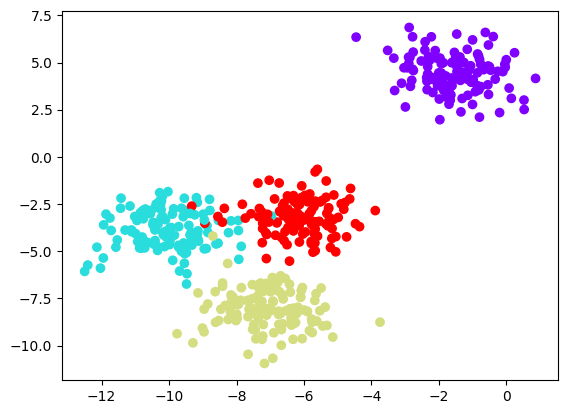

In [43]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from unsupervised.K_Means import K_Means
from unsupervised.K_Medoids import K_Medoids
import numpy as np

X, y = make_blobs(
n_samples=500,
n_features=2,
centers=4,
cluster_std=1,
center_box=(-10.0, 10.0),
shuffle=True,
random_state=1,)

plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow')
plt.show()

## Solution B
there are 4 clusters, 3 of them are so close between theirselfs, but the fourth cluster is farway from the others 3 clusters

## Solution C

In [ ]:
def silhouette_coefficent(reference_dot,X):
    from scipy.spatial.distance import cdist
    import numpy as np
    #compute the distances between a dot to all the points in the cluster

    indices = np.where(self.labels == j)[0]


    distances = cdist(X, reference_dot, metric='euclidean')
    a=np.sum(distances, axis=1)


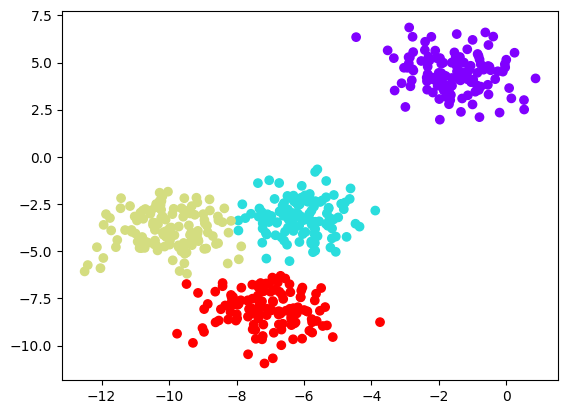

In [17]:
K_means2=K_Means()
y_new=K_means2.fit_transform(X=X,K=4,max_iters=1000)
plt.scatter(X[:,0], X[:,1], c=y_new, cmap='rainbow')
plt.show()

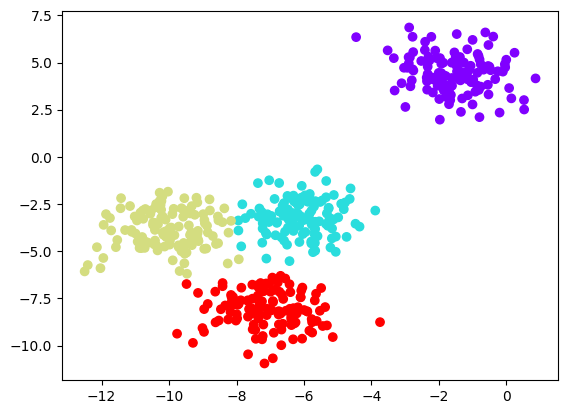

array([3, 3, 2, 0, 1, 0, 1, 1, 1, 1, 3, 3, 1, 0, 1, 3, 1, 3, 0, 1, 2, 2,
       1, 0, 1, 1, 0, 0, 2, 1, 3, 0, 1, 3, 1, 3, 2, 2, 3, 2, 1, 2, 0, 1,
       1, 3, 2, 1, 0, 0, 0, 2, 2, 1, 3, 2, 2, 2, 2, 1, 0, 0, 2, 1, 0, 1,
       3, 1, 2, 2, 3, 2, 1, 3, 1, 1, 3, 1, 1, 2, 0, 0, 2, 0, 0, 2, 2, 0,
       2, 2, 0, 3, 2, 1, 0, 3, 3, 1, 3, 0, 0, 3, 0, 2, 0, 1, 1, 0, 0, 2,
       1, 3, 0, 2, 0, 2, 0, 1, 0, 1, 2, 3, 3, 2, 1, 2, 0, 3, 3, 1, 0, 2,
       2, 2, 2, 3, 0, 1, 0, 0, 1, 3, 1, 0, 0, 0, 1, 1, 3, 3, 2, 2, 0, 3,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 3, 3, 1, 0, 3, 2, 1, 3, 0, 2,
       2, 2, 2, 3, 1, 2, 0, 3, 3, 2, 1, 3, 3, 1, 0, 0, 3, 3, 1, 0, 1, 3,
       3, 0, 3, 2, 0, 1, 1, 3, 1, 2, 3, 1, 2, 1, 2, 3, 1, 1, 1, 0, 2, 0,
       1, 3, 2, 1, 2, 2, 2, 0, 2, 0, 3, 2, 3, 2, 0, 0, 2, 3, 0, 3, 1, 2,
       3, 3, 3, 3, 1, 2, 3, 2, 1, 0, 0, 1, 1, 0, 2, 1, 2, 0, 1, 0, 2, 2,
       0, 1, 3, 3, 2, 2, 2, 1, 0, 0, 1, 0, 2, 3, 0, 3, 0, 3, 3, 0, 3, 0,
       0, 1, 2, 2, 2, 1, 1, 2, 3, 0, 3, 3, 3, 1, 2,

In [67]:
K_medoids2=K_Medoids()
y_new_Medoids=K_medoids2.fit_transform(X=X,K=4,max_iters=1000)
plt.scatter(X[:,0], X[:,1], c=y_new_Medoids, cmap='rainbow')
plt.show()
y_new_Medoids

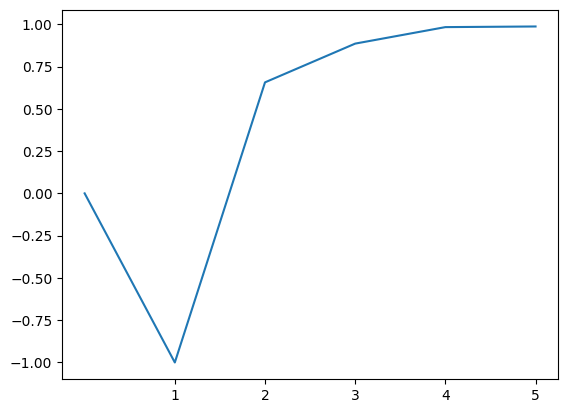

In [66]:
avr_sc=[]
avr_sc.append(0)
for i in range(1,6):    
    K_medoids=K_Medoids()
    K_medoids.fit(X=X,K=i,max_iters=1000)
    avr_sc.append(np.average(K_medoids.silhouette_coefficent()))

plt.plot(avr_sc[:])
plt.xticks([1,2,3,4,5])
plt.show()
# plt.plot(avr_sc[1:])
# plt.xlabel('Indices')
# plt.ylabel('Valores')
# plt.title('Mi Gráfico de Línea')
# plt.show()


In [46]:
K_medoids.silhouette_coefficent

<bound method K_Medoids.silhouette_coefficent of <unsupervised.K_Medoids.K_Medoids object at 0x000001CE7B39C8D0>>

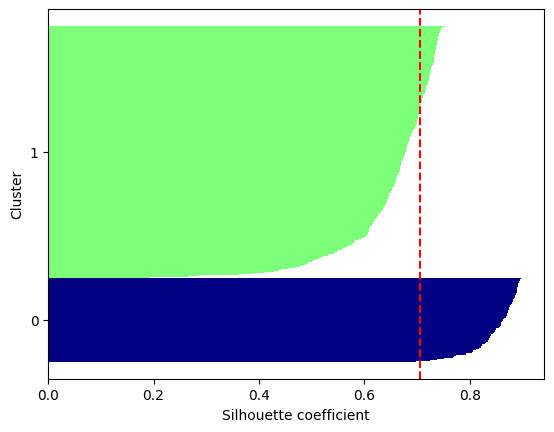

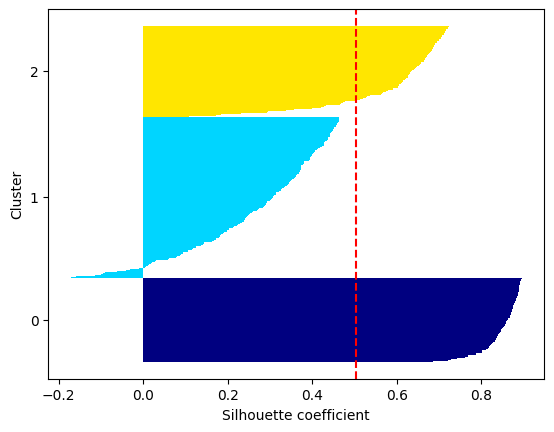

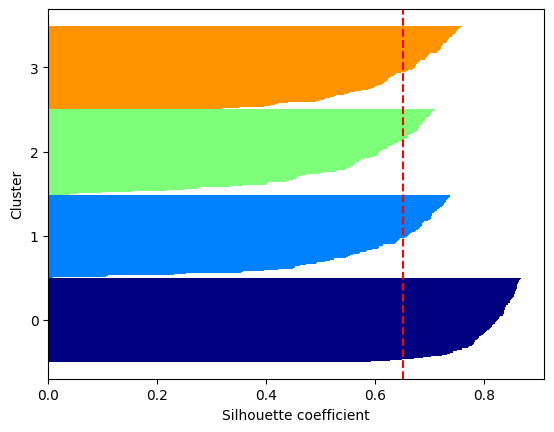

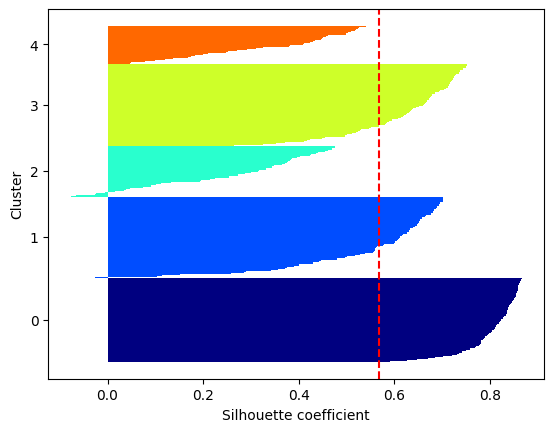

In [72]:
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm

for n_clusters in range(2,6):
    K_medoids2=K_Medoids()
    labels=K_medoids2.fit_transform(X=X,K=n_clusters,max_iters=1000)
    silhouette_vals = silhouette_samples(X, labels, metric='euclidean')
    silhouette_avg = silhouette_score(X, labels, metric='euclidean')

    y_lower, y_upper = 0, 0
    yticks = []
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_lower + y_upper) / 2.)
        y_lower += len(cluster_silhouette_vals)

    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, np.unique(labels))
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()
